# Feature Engineering en SQL

A continuación, veremos cómo calcular diferentes variables para el feature engineering utilizando SQL.


**DuckDB**: Es un sistema de base de datos SQL rápido y embebible, que se puede utilizar con grandes conjuntos de datos directamente en memoria.
**JupySQL:** Una extensión que permite ejecutar comandos SQL dentro de los cuadernos de Jupyter, facilitando la ejecución de consultas SQL.
**DuckDB-engine:** Un paquete de Python que permite conectar una instancia de DuckDB a través de SQLAlchemy, integrando los comandos SQL directamente en el código Python.

In [1]:
%pip install duckdb
%pip install jupysql
%pip install duckdb-engine

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\mconde\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\mconde\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\mconde\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import duckdb
import pandas as pd

#%load_ext sql
%reload_ext sql
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb://

In [ ]:
# #Crear una conexión a DuckDB en memoria
# con = duckdb.connect()

In [ ]:
# # Crear una conexión a un archivo de base de datos persistente
# con = duckdb.connect('mi_base_de_datos.duckdb')

In [ ]:
# %%sql
# PRAGMA max_temp_directory_size='30GiB';


,Success


In [6]:
#seteo carpeta de trabajo y archivo
dataset_path = 'C:/Users/mconde/dmeyf2024/Competencia_02/'
# dataset_path = '~/buckets/b1/datasets' ojo esto cuando tenga colab en la nube
dataset_file = 'competencia_02.csv.gz'

creo una tabla desde mi archivo original

In [7]:
%%sql
create or replace table competencia_02 as
select
    *
from read_csv_auto("{{dataset_path + dataset_file}}")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,Success


como veo esa nueva tabla de sql

In [8]:
%%sql
select * from competencia_02 limit 15

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
0,249667857,201901,1,0,1,77,44,3549.77,26235.50,1336.82,...,22,20187.82,-19947.41,0.0,1177,13082.33,11,0,1208.19,CONTINUA
1,249667857,201902,1,0,1,77,45,3064.96,27805.96,1204.60,...,22,23509.10,-20187.82,0.0,1205,16030.44,12,0,1372.41,CONTINUA
2,249667857,201903,1,0,1,77,46,3933.42,29754.83,1325.10,...,25,18783.06,-23509.10,0.0,1236,14031.44,12,0,1102.62,CONTINUA
3,249667857,201904,1,0,1,77,47,5016.42,32881.14,1378.13,...,20,19062.68,-18783.06,0.0,1266,13431.42,11,0,1231.65,CONTINUA
4,249667857,201905,1,0,1,77,48,0.00,0.00,0.00,...,23,20934.23,-19062.68,0.0,1297,14174.00,10,0,1325.49,CONTINUA
5,249667857,201906,1,0,1,77,49,5398.26,40238.53,1378.50,...,25,23668.03,-20934.23,0.0,1327,16980.37,14,0,1501.44,CONTINUA
6,249667857,201907,1,0,1,78,50,5128.96,42692.96,1485.41,...,21,25771.40,-23668.03,0.0,1358,20258.23,15,0,1595.28,CONTINUA
7,249667857,201908,1,0,1,78,51,4973.30,45599.92,1832.68,...,24,25898.91,-25771.40,0.0,1389,18306.01,15,0,1994.10,CONTINUA
8,249667857,201909,1,0,1,78,52,4822.70,48395.34,2137.21,...,26,29407.15,-25898.91,0.0,1419,21658.91,13,0,1970.64,CONTINUA
9,249667857,201910,1,0,1,78,53,0.00,0.00,0.00,...,22,34071.50,-29407.15,0.0,1450,26525.64,14,0,1782.96,CONTINUA


dimensiones de la tabla competencia

In [9]:
%%sql
select count(*) as filas from competencia_02

,filas
0,4735593


In [45]:
%%sql
SELECT *
FROM competencia_02
WHERE cliente_edad IS NULL

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria


compara las fechas de vencimiento de las tarjetas MasterCard y Visa de la tabla competencia_01. Aquí te explico lo que hace cada parte de la consulta:

Explicación de la consulta:
Master_Fvencimiento y Visa_Fvencimiento:

Selecciona las columnas correspondientes a las fechas de vencimiento de las tarjetas MasterCard y Visa.
greatest(Master_Fvencimiento, Visa_Fvencimiento) as tc_fvencimiento_mayor:

Usa la función greatest() para obtener el valor más grande (la fecha más reciente) entre las dos columnas Master_Fvencimiento y Visa_Fvencimiento. Este valor se guarda con el alias tc_fvencimiento_mayor.
least(Master_Fvencimiento, Visa_Fvencimiento) as tc_fvencimiento_menor:

Similar a la función greatest(), pero least() devuelve el valor más pequeño (la fecha más antigua) entre las dos fechas. Se guarda con el alias tc_fvencimiento_menor.

#no correr

In [ ]:
# %%sql
# select
#     Master_Fvencimiento
#     , Visa_Fvencimiento
#     , greatest(Master_Fvencimiento, Visa_Fvencimiento) as tc_fvencimiento_mayor
#     , least(Master_Fvencimiento, Visa_Fvencimiento) as tc_fvencimiento_menor
# from competencia_01 limit 10

,Master_Fvencimiento,Visa_Fvencimiento,tc_fvencimiento_mayor,tc_fvencimiento_menor
0,-880,-1033,-880,-1033
1,-852,-1005,-852,-1005
2,-821,-974,-821,-974
3,-791,-944,-791,-944
4,-760,-913,-760,-913
5,-730,-883,-730,-883
6,-699,-852,-699,-852
7,-668,-821,-668,-821
8,-638,-791,-638,-791
9,-607,-760,-607,-760


Lo siguiente es querer operar dos variables, como por ejemplo sumarla. Esto es sencillo


In [ ]:
# %%sql
# select
#     Master_msaldototal
#     , Visa_msaldototal
#     , Master_msaldototal + Visa_msaldototal as tc_saldo_total
# from competencia_01 limit 10

Pero un DS de a de veras mirará los datos y se encontrará con un campo que es null cuando se lo suma a otro dará null.

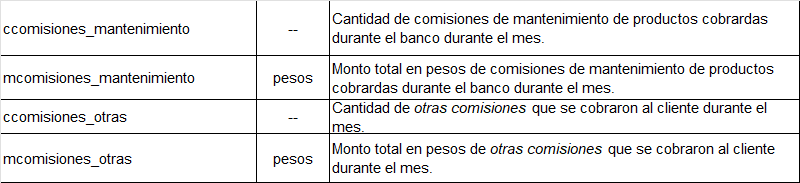

In [ ]:
# %%sql
# select
#     Master_msaldototal
#     , Visa_msaldototal
#     , Master_msaldototal + Visa_msaldototal as tc_saldo_total
# from competencia_01 where Master_msaldototal is null limit 10

Esto no siempre es deseable y puede ser fácilmente evitable

#corro

In [ ]:
# %%sql
# create or replace table competencia_02 as
# select
#     *
#     , ifnull(Master_msaldototal, 0) + ifnull(Visa_msaldototal, 0) as tc_saldo_total
# from competencia_02 where Master_msaldototal is null limit 10

,Success


Arma como un macro o funcion suma_sin_null que despeus lo podrias usar en cualqeuir cosa

In [10]:
%%sql
CREATE OR REPLACE MACRO suma_sin_null(a, b) AS ifnull(a, 0) + ifnull(b, 0);


,Success


todas las variables que ya estaban

In [ ]:
# %%sql
# select
#     Master_msaldototal
#    , Visa_msaldototal
#    , suma_sin_null(Master_msaldototal, Visa_msaldototal) as tc_saldo_total
# from competencia_02 limit 10

,Master_msaldototal,Visa_msaldototal,tc_saldo_total
0,NaN,17593.61,17593.61
1,NaN,12019.22,12019.22
2,NaN,13867.26,13867.26
3,NaN,12646.40,12646.40
4,NaN,12448.20,12448.20
5,NaN,25969.17,25969.17
6,NaN,12641.61,12641.61
7,NaN,26335.49,26335.49
8,NaN,15120.13,15120.13
9,NaN,14592.74,14592.74


# agrego a la tabla las dos variables de recien

In [11]:
%%sql
create or replace table competencia_02 as
select
    *
    , suma_sin_null(Master_msaldototal, Visa_msaldototal) as tc_saldo_total
    , greatest(Master_Fvencimiento, Visa_Fvencimiento) as tc_fvencimiento_mayor
    , least(Master_Fvencimiento, Visa_Fvencimiento) as tc_fvencimiento_menor
from competencia_02

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,Success


In [12]:
%%sql
select * from competencia_02 limit 20

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria,tc_saldo_total,tc_fvencimiento_mayor,tc_fvencimiento_menor
0,249667857,201901,1,0,1,77,44,3549.77,26235.50,1336.82,...,0.0,1177,13082.33,11,0,1208.19,CONTINUA,32293.65,-880,-1033
1,249667857,201902,1,0,1,77,45,3064.96,27805.96,1204.60,...,0.0,1205,16030.44,12,0,1372.41,CONTINUA,30918.72,-852,-1005
2,249667857,201903,1,0,1,77,46,3933.42,29754.83,1325.10,...,0.0,1236,14031.44,12,0,1102.62,CONTINUA,28784.02,-821,-974
3,249667857,201904,1,0,1,77,47,5016.42,32881.14,1378.13,...,0.0,1266,13431.42,11,0,1231.65,CONTINUA,28854.37,-791,-944
4,249667857,201905,1,0,1,77,48,0.00,0.00,0.00,...,0.0,1297,14174.00,10,0,1325.49,CONTINUA,30767.74,-760,-913
5,249667857,201906,1,0,1,77,49,5398.26,40238.53,1378.50,...,0.0,1327,16980.37,14,0,1501.44,CONTINUA,30317.68,-730,-883
6,249667857,201907,1,0,1,78,50,5128.96,42692.96,1485.41,...,0.0,1358,20258.23,15,0,1595.28,CONTINUA,34007.31,-699,-852
7,249667857,201908,1,0,1,78,51,4973.30,45599.92,1832.68,...,0.0,1389,18306.01,15,0,1994.10,CONTINUA,32280.69,-668,-821
8,249667857,201909,1,0,1,78,52,4822.70,48395.34,2137.21,...,0.0,1419,21658.91,13,0,1970.64,CONTINUA,40293.18,-638,-791
9,249667857,201910,1,0,1,78,53,0.00,0.00,0.00,...,0.0,1450,26525.64,14,0,1782.96,CONTINUA,45746.56,-607,-760


TAREA: Escriba una macro para hacer un ratio de dos variables que sea seguro, donde no solo hay campos con null, también esta el problema de la división por cero. Como es costumbre comparta su solución por este canal. Lea https://duckdb.org/docs/sql/functions/numeric.html para referencias de funciones que puede usar.

---

"Claro!" me dirá, mientras lee esto con un mate en la mano, "para cosas fáciles usar SQL alcanza, pero para algo más complicado como crear campos contra el data drifting es difícil".... elija su medicina:

In [13]:
%%sql
CREATE OR REPLACE MACRO sum_nan(a, b, c) AS ifnull(a, 0) + ifnull(b, 0) + ifnull(c, 0);


,Success


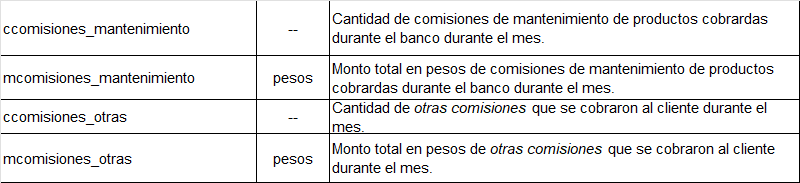

In [ ]:
#monto total de prestamos
# %%sql
# select
#     ccomisiones_mantenimiento
#     , ccomisiones_otras
#     , suma_sin_null(ccomisiones_mantenimiento, ccomisiones_otras) as comision_total
# from competencia_01 limit 10

,ccomisiones_mantenimiento,ccomisiones_otras,comision_total
0,1,10,11
1,1,10,11
2,1,8,9
3,0,10,10
4,0,10,10
5,0,8,8
6,0,6,6
7,0,4,4
8,0,6,6
9,0,4,4


In [ ]:
# %%sql
# select
#     mcomisiones_mantenimiento
#     , mcomisiones_otras
#     , suma_sin_null(mcomisiones_mantenimiento, mcomisiones_otras) as mcomision_total
# from competencia_01 limit 10

,mcomisiones_mantenimiento,mcomisiones_otras,mcomision_total
0,2626.15,3265.66,5891.81
1,-2626.15,-1415.27,-4041.42
2,-2626.15,1001.36,-1624.79
3,0.00,1140.60,1140.60
4,0.00,3103.40,3103.40
5,0.00,806.02,806.02
6,0.00,141.58,141.58
7,0.00,98.28,98.28
8,0.00,492.97,492.97
9,0.00,98.97,98.97


In [14]:
%%sql
create or replace table competencia_02 as
select
    *
    , suma_sin_null(ccomisiones_mantenimiento, ccomisiones_otras) as comision_total
    , suma_sin_null(mcomisiones_mantenimiento, mcomisiones_otras) as monto_comision_total
from competencia_02

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,Success


como chequeo nombre de las variables

In [15]:
%%sql
select * from 'competencia_02' limit 20

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria,tc_saldo_total,tc_fvencimiento_mayor,tc_fvencimiento_menor,comision_total,monto_comision_total
0,249667857,201901,1,0,1,77,44,3549.77,26235.50,1336.82,...,13082.33,11,0,1208.19,CONTINUA,32293.65,-880,-1033,17,2060.33
1,249667857,201902,1,0,1,77,45,3064.96,27805.96,1204.60,...,16030.44,12,0,1372.41,CONTINUA,30918.72,-852,-1005,16,1928.11
2,249667857,201903,1,0,1,77,46,3933.42,29754.83,1325.10,...,14031.44,12,0,1102.62,CONTINUA,28784.02,-821,-974,13,2250.90
3,249667857,201904,1,0,1,77,47,5016.42,32881.14,1378.13,...,13431.42,11,0,1231.65,CONTINUA,28854.37,-791,-944,13,2303.93
4,249667857,201905,1,0,1,77,48,0.00,0.00,0.00,...,14174.00,10,0,1325.49,CONTINUA,30767.74,-760,-913,1,925.80
5,249667857,201906,1,0,1,77,49,5398.26,40238.53,1378.50,...,16980.37,14,0,1501.44,CONTINUA,30317.68,-730,-883,16,2304.30
6,249667857,201907,1,0,1,78,50,5128.96,42692.96,1485.41,...,20258.23,15,0,1595.28,CONTINUA,34007.31,-699,-852,11,2411.21
7,249667857,201908,1,0,1,78,51,4973.30,45599.92,1832.68,...,18306.01,15,0,1994.10,CONTINUA,32280.69,-668,-821,17,2924.73
8,249667857,201909,1,0,1,78,52,4822.70,48395.34,2137.21,...,21658.91,13,0,1970.64,CONTINUA,40293.18,-638,-791,11,3229.26
9,249667857,201910,1,0,1,78,53,0.00,0.00,0.00,...,26525.64,14,0,1782.96,CONTINUA,45746.56,-607,-760,1,1092.05


armo un macro para un ratio

In [16]:
%%sql
CREATE OR REPLACE MACRO ratio(a, b) AS ifnull(a, 0) / ifnull(b, 0);

,Success


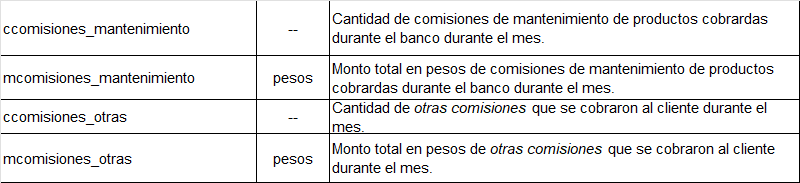

total ingresos

In [ ]:
# %%sql
# select
#     monto_comision_total
#     , comision_total
#     , mcomisiones_mantenimiento
#     , ratio(monto_comision_total, comision_total) as promedio_comision
#     , ratio(mcomisiones_mantenimiento, monto_comision_total) as ratio_mantenimiento
# from competencia_02


,monto_comision_total,comision_total,mcomisiones_mantenimiento,promedio_comision,ratio_mantenimiento
0,2060.33,17,723.51,121.195882,0.351162
1,1928.11,16,723.51,120.506875,0.375243
2,2250.90,13,925.80,173.146154,0.411302
3,2303.93,13,925.80,177.225385,0.401835
4,925.80,1,925.80,925.800000,1.000000
...,...,...,...,...,...
4735588,416.89,2,0.00,208.445000,0.000000
4735589,969.39,4,0.00,242.347500,0.000000
4735590,5312.66,5,2505.95,1062.532000,0.471694
4735591,5709.34,5,3007.14,1141.868000,0.526705


total ingresos

In [17]:

%%sql
create or replace table competencia_02 as
select
    *
    , ratio(monto_comision_total, comision_total) as promedio_comision
    , ratio(mcomisiones_mantenimiento, monto_comision_total) as ratio_mantenimiento
from competencia_02

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,Success


analisis de los clientes

In [ ]:
# %%sql
# select
#     foto_mes
#     , numero_de_cliente
#     , cliente_antiguedad
#     , row_number() over (partition by numero_de_cliente order by foto_mes) as cliente_antiguedad_2
#     , percent_rank() over (partition by foto_mes order by cliente_antiguedad) as cliente_antiguedad_3
#     , cume_dist() over (partition by foto_mes order by cliente_antiguedad) as cliente_antiguedad_4
#     , ntile(4) over (partition by foto_mes order by cliente_antiguedad) as cliente_antiguedad_5
#     , ntile(10) over (partition by foto_mes order by cliente_antiguedad) as cliente_antiguedad_6
# from competencia_02
# order by numero_de_cliente, cliente_antiguedad


,foto_mes,numero_de_cliente,cliente_antiguedad,cliente_antiguedad_2,cliente_antiguedad_3,cliente_antiguedad_4,cliente_antiguedad_5,cliente_antiguedad_6
0,201901,249221109,276,1,0.931744,0.932242,4,10
1,201902,249221109,277,2,0.932423,0.932909,4,10
2,201903,249221109,278,3,0.932724,0.933215,4,10
3,201904,249221109,279,4,0.933100,0.933588,4,10
4,201905,249221109,280,5,0.933533,0.934020,4,10
...,...,...,...,...,...,...,...,...
4735588,202108,1603590310,1,1,0.000000,0.001578,1,1
4735589,202108,1603703854,1,1,0.000000,0.001578,1,1
4735590,202108,1603775178,1,1,0.000000,0.001578,1,1
4735591,202108,1603805076,1,1,0.000000,0.001578,1,1


In [18]:
%%sql
create or replace table competencia_02 as
select
    *
    , row_number() over (partition by numero_de_cliente order by foto_mes) as cliente_antiguedad_2
    , percent_rank() over (partition by foto_mes order by cliente_antiguedad) as cliente_antiguedad_3
    , cume_dist() over (partition by foto_mes order by cliente_antiguedad) as cliente_antiguedad_4
    , ntile(4) over (partition by foto_mes order by cliente_antiguedad) as cliente_antiguedad_5
    , ntile(10) over (partition by foto_mes order by cliente_antiguedad) as cliente_antiguedad_6
from competencia_02


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

RuntimeError: (duckdb.duckdb.IOException) IO Error: Failed to delete file ".tmp\duckdb_temp_block-4611686018427793944.block": Acceso denegado.

[SQL: create or replace table competencia_02 as
select
    *
    , row_number() over (partition by numero_de_cliente order by foto_mes) as cliente_antiguedad_2
    , percent_rank() over (partition by foto_mes order by cliente_antiguedad) as cliente_antiguedad_3
    , cume_dist() over (partition by foto_mes order by cliente_antiguedad) as cliente_antiguedad_4
    , ntile(4) over (partition by foto_mes order by cliente_antiguedad) as cliente_antiguedad_5
    , ntile(10) over (partition by foto_mes order by cliente_antiguedad) as cliente_antiguedad_6
from competencia_02]
(Background on this error at: https://sqlalche.me/e/20/e3q8)
If you need help solving this issue, send us a message: https://ploomber.io/community


Qué paso? use las hermosas funciones analíticas de SQL. Al campo cliente_antiguedad (que no sufre de data drifting, solo esta para dar el ejemplo) para cada período (partition by foto_mes) la ordeno (order by cliente_antiguedad) y luego calculo las métricas de orden que pueden encontrar acá https://duckdb.org/docs/sql/window_functions.html#general-purpose-window-functions.

Seguiremos usando las funciones analíticas de SQL, esta vez para calcular features que utilizan valores del pasado.

Qué pasa si quiero agregar un feature que muestre el valor del periodo anterior?


In [ ]:
# %%sql
# select
#   numero_de_cliente
#   , foto_mes
#   , ctrx_quarter
#   , lag(ctrx_quarter, 1) over (partition by numero_de_cliente order by foto_mes) as lag_1_ctrx_quarter
# from competencia_02
# limit 10


,numero_de_cliente,foto_mes,ctrx_quarter,lag_1_ctrx_quarter
0,249305414,201901,302,NaN
1,249305414,201902,322,302.0
2,249305414,201903,308,322.0
3,249305414,201904,303,308.0
4,249305414,201905,307,303.0
5,249305414,201906,318,307.0
6,249305414,201907,312,318.0
7,249305414,201908,342,312.0
8,249305414,201909,357,342.0
9,249305414,201910,377,357.0


Podemos calcular el delta (diferencia) entre el valor pasado y el presente, para uno o varios meses


In [ ]:
# %%sql
# select
#   numero_de_cliente
#   , foto_mes
#   , ctrx_quarter
#   , lag(ctrx_quarter, 1) over (partition by numero_de_cliente order by foto_mes) as lag_1_ctrx_quarter
#   , ctrx_quarter - lag_1_ctrx_quarter as delta_1_ctrx_quarter
#   , ctrx_quarter - lag(ctrx_quarter, 2) over (partition by numero_de_cliente order by foto_mes) as lag_2_ctrx_quarter
# from competencia_02
# limit 10


,numero_de_cliente,foto_mes,ctrx_quarter,lag_1_ctrx_quarter,delta_1_ctrx_quarter,lag_2_ctrx_quarter
0,249305414,201901,302,NaN,NaN,NaN
1,249305414,201902,322,302.0,20.0,NaN
2,249305414,201903,308,322.0,-14.0,6.0
3,249305414,201904,303,308.0,-5.0,-19.0
4,249305414,201905,307,303.0,4.0,-1.0
5,249305414,201906,318,307.0,11.0,15.0
6,249305414,201907,312,318.0,-6.0,5.0
7,249305414,201908,342,312.0,30.0,24.0
8,249305414,201909,357,342.0,15.0,45.0
9,249305414,201910,377,357.0,20.0,35.0


Si necesitamos ya no solo traer un valor del pasado, sino una secuencia de valores, por ejemplo para calcular la media móvil con los últimos 3 meses anteriores? se puede hacer fácilmente


corro

In [ ]:

# %%sql
# select
#   numero_de_cliente
#   , foto_mes
#   , ctrx_quarter
#   , lag(ctrx_quarter, 1) over (partition by numero_de_cliente order by foto_mes) as lag_1_ctrx_quarter
#   , lag(ctrx_quarter, 2) over (partition by numero_de_cliente order by foto_mes) as lag_2_ctrx_quarter
#   , lag(ctrx_quarter, 3) over (partition by numero_de_cliente order by foto_mes) as lag_3_ctrx_quarter
#   , ctrx_quarter - lag_1_ctrx_quarter as delta_1_ctrx_quarter
#   , ctrx_quarter - lag(ctrx_quarter, 2) over (partition by numero_de_cliente order by foto_mes) as lag_2_ctrx_quarter
#   , avg(ctrx_quarter) over (partition by numero_de_cliente
#                             order by foto_mes
#                             rows between 3 preceding and current row) as avg_3_ctrx_quarter
# from competencia_02
# order by numero_de_cliente, foto_mes
# limit 10


,numero_de_cliente,foto_mes,ctrx_quarter,lag_1_ctrx_quarter,lag_2_ctrx_quarter,lag_3_ctrx_quarter,delta_1_ctrx_quarter,lag_2_ctrx_quarter_1,avg_3_ctrx_quarter
0,249221109,201901,164,NaN,NaN,NaN,NaN,NaN,164.000000
1,249221109,201902,147,164.0,NaN,NaN,-17.0,NaN,155.500000
2,249221109,201903,122,147.0,164.0,NaN,-25.0,-42.0,144.333333
3,249221109,201904,120,122.0,147.0,164.0,-2.0,-27.0,138.250000
4,249221109,201905,126,120.0,122.0,147.0,6.0,4.0,128.750000
5,249221109,201906,126,126.0,120.0,122.0,0.0,6.0,123.500000
6,249221109,201907,116,126.0,126.0,120.0,-10.0,-10.0,122.000000
7,249221109,201908,114,116.0,126.0,126.0,-2.0,-12.0,120.500000
8,249221109,201909,119,114.0,116.0,126.0,5.0,3.0,118.750000
9,249221109,201910,120,119.0,114.0,116.0,1.0,6.0,117.250000


In [95]:
# Aumentar el límite de espacio temporal
con.execute("PRAGMA max_temp_directory_size='50GiB'")


 Ejecutar tu consulta después de configurar los límites

In [98]:
con.execute("""
create or replace table competencia_02 as
select
  *,
  lag(ctrx_quarter, 1) over (partition by numero_de_cliente order by foto_mes) as lag_1_ctrx_quarter,
  lag(ctrx_quarter, 2) over (partition by numero_de_cliente order by foto_mes) as lag_2_ctrx_quarter,
  lag(ctrx_quarter, 3) over (partition by numero_de_cliente order by foto_mes) as lag_3_ctrx_quarter,
  ctrx_quarter - lag(ctrx_quarter, 1) over (partition by numero_de_cliente order by foto_mes) as delta_1_ctrx_quarter,
  avg(ctrx_quarter) over (partition by numero_de_cliente order by foto_mes rows between 3 preceding and current row) as avg_3_ctrx_quarter
from competencia_02
""")

CatalogException: Catalog Error: Table with name competencia_02 does not exist!
Did you mean "information_schema.columns"?
LINE 10: from competencia_02
              ^

In [101]:

%%sql
SHOW TABLES;


,Success


esta no la puedo correr pr memoria desde visua code

In [19]:
%%sql
create or replace table competencia_02 as
select
  *
  , lag(ctrx_quarter, 1) over (partition by numero_de_cliente order by foto_mes) as lag_1_ctrx_quarter
  , lag(ctrx_quarter, 2) over (partition by numero_de_cliente order by foto_mes) as lag_2_ctrx_quarter
  , lag(ctrx_quarter, 3) over (partition by numero_de_cliente order by foto_mes) as lag_3_ctrx_quarter
  , ctrx_quarter - lag_1_ctrx_quarter as delta_1_ctrx_quarter
  , ctrx_quarter - lag(ctrx_quarter, 2) over (partition by numero_de_cliente order by foto_mes) as lag_2_ctrx_quarter
  , avg(ctrx_quarter) over (partition by numero_de_cliente
                            order by foto_mes
                            rows between 3 preceding and current row) as avg_3_ctrx_quarter
from competencia_02


,Success


ver cantidad de columnas

In [20]:
%%sql
select count(*) from information_schema.columns where table_name = 'competencia_02'

,count_star()
0,173


In [21]:
%%sql
select * from competencia_02 limit 20

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,cliente_antiguedad_3,cliente_antiguedad_4,cliente_antiguedad_5,cliente_antiguedad_6,lag_1_ctrx_quarter,lag_2_ctrx_quarter,lag_3_ctrx_quarter,delta_1_ctrx_quarter,lag_2_ctrx_quarter_1,avg_3_ctrx_quarter
0,249305414,201901,1,0,1,41,237,18569.28,95840.03,1603.62,...,0.876746,0.878423,4,9,NaN,NaN,NaN,NaN,NaN,302.000000
1,249305414,201902,1,0,1,41,238,5429.65,100066.94,1622.81,...,0.877788,0.879459,4,9,302.0,NaN,NaN,20.0,NaN,312.000000
2,249305414,201903,1,0,1,41,239,10829.33,109652.74,1253.06,...,0.878333,0.879995,4,9,322.0,302.0,NaN,-14.0,6.0,310.666667
3,249305414,201904,1,0,1,42,240,11344.81,119764.20,1547.82,...,0.878948,0.880603,4,9,308.0,322.0,302.0,-5.0,-19.0,308.750000
4,249305414,201905,1,0,1,42,241,0.00,0.00,0.00,...,0.879639,0.881285,4,9,303.0,308.0,322.0,4.0,-1.0,310.000000
5,249305414,201906,1,0,1,42,242,19487.83,127948.18,1374.70,...,0.880760,0.882402,4,9,307.0,303.0,308.0,11.0,15.0,309.000000
6,249305414,201907,1,0,1,42,243,14284.74,136447.71,3886.53,...,0.882033,0.883686,4,9,318.0,307.0,303.0,-6.0,5.0,310.000000
7,249305414,201908,1,0,1,42,244,18763.58,150211.00,6468.34,...,0.883585,0.885214,4,9,312.0,318.0,307.0,30.0,24.0,319.750000
8,249305414,201909,1,0,1,42,245,24764.86,171385.98,9140.33,...,0.884940,0.886564,4,9,342.0,312.0,318.0,15.0,45.0,332.250000
9,249305414,201910,1,0,1,42,246,0.00,0.00,0.00,...,0.886597,0.888200,4,9,357.0,342.0,312.0,20.0,35.0,347.000000


Si embargo puede resultar incómodo escribir constantemente el over partition sobre todo si se buscan aplicar muchas veces para distintas funciones. Para reducir el código se puede usar la siguiente sintaxis



In [ ]:
# %%sql
# select
#   numero_de_cliente
#   , foto_mes
#   , ctrx_quarter
#   , avg(ctrx_quarter) over ventana_3 as ctrx_quarter_media_3
#   , max(ctrx_quarter) over ventana_3 as ctrx_quarter_max_3
#   , min(ctrx_quarter) over ventana_3 as ctrx_quarter_min_3
# from competencia_02
# window ventana_3 as (partition by numero_de_cliente order by foto_mes rows between 3 preceding and current row)
# limit 10


,numero_de_cliente,foto_mes,ctrx_quarter,ctrx_quarter_media_3,ctrx_quarter_max_3,ctrx_quarter_min_3
0,249223005,201901,98,98.000000,98,98
1,249223005,201902,118,108.000000,118,98
2,249223005,201903,124,113.333333,124,98
3,249223005,201904,115,113.750000,124,98
4,249223005,201905,93,112.500000,124,93
5,249223005,201906,99,107.750000,124,93
6,249223005,201907,116,105.750000,116,93
7,249223005,201908,128,109.000000,128,93
8,249223005,201909,135,119.500000,135,99
9,249223005,201910,141,130.000000,141,116


In [22]:
%%sql
create or replace table competencia_02 as
select
  *
  ,avg(ctrx_quarter) over ventana_3 as ctrx_quarter_media_3
  , max(ctrx_quarter) over ventana_3 as ctrx_quarter_max_3
  , min(ctrx_quarter) over ventana_3 as ctrx_quarter_min_3
from competencia_02
window ventana_3 as (partition by numero_de_cliente order by foto_mes rows between 3 preceding and current row)


,Success


In [23]:
%%sql
select * from competencia_02 limit 15


,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,cliente_antiguedad_6,lag_1_ctrx_quarter,lag_2_ctrx_quarter,lag_3_ctrx_quarter,delta_1_ctrx_quarter,lag_2_ctrx_quarter_1,avg_3_ctrx_quarter,ctrx_quarter_media_3,ctrx_quarter_max_3,ctrx_quarter_min_3
0,249584210,201901,1,0,1,52,169,1405.48,10582.72,387.06,...,8,NaN,NaN,NaN,NaN,NaN,90.000000,90.000000,90,90
1,249584210,201902,1,0,1,52,170,2502.19,12520.96,391.40,...,8,90.0,NaN,NaN,0.0,NaN,90.000000,90.000000,90,90
2,249584210,201903,1,0,1,52,171,4363.80,16187.13,1431.25,...,8,90.0,90.0,NaN,5.0,5.0,91.666667,91.666667,95,90
3,249584210,201904,1,0,1,52,172,1236.94,17142.51,177.97,...,8,95.0,90.0,90.0,-12.0,-7.0,89.500000,89.500000,95,83
4,249584210,201905,1,0,1,52,173,0.00,0.00,0.00,...,8,83.0,95.0,90.0,1.0,-11.0,88.000000,88.000000,95,83
5,249584210,201906,1,0,1,52,174,1229.89,18536.52,179.10,...,8,84.0,83.0,95.0,-16.0,-15.0,82.500000,82.500000,95,68
6,249584210,201907,1,0,1,52,175,1024.18,17657.01,235.32,...,8,68.0,84.0,83.0,0.0,-16.0,75.750000,75.750000,84,68
7,249584210,201908,1,0,1,53,176,754.90,16985.94,265.01,...,8,68.0,68.0,84.0,-16.0,-16.0,68.000000,68.000000,84,52
8,249584210,201909,1,0,1,53,177,573.80,17039.33,356.85,...,8,52.0,68.0,68.0,10.0,-6.0,62.500000,62.500000,68,52
9,249584210,201910,1,0,1,53,178,0.00,0.00,0.00,...,8,62.0,52.0,68.0,16.0,26.0,65.000000,65.000000,78,52


Para saber más que funciones tenemos disponibles, recomiendo ver los siguientes links:

https://duckdb.org/docs/archive/0.8.1/sql/window_functions
https://duckdb.org/docs/archive/0.8.1/sql/aggregates
Un caso más, que ni me voy a molestar en explicar que significa...


In [ ]:
# %%sql
# select
#   numero_de_cliente
#   , foto_mes
#   , ctrx_quarter
#   ,regr_slope(ctrx_quarter, cliente_antiguedad) over ventana_3 as ctrx_quarter_slope_3
# from competencia_01
# window ventana_3 as (partition by numero_de_cliente order by foto_mes rows between 3 preceding and current row)
# limit 10


,numero_de_cliente,foto_mes,ctrx_quarter,ctrx_quarter_slope_3
0,249237079,201901,134,NaN
1,249237079,201902,139,5.000000e+00
2,249237079,201903,134,7.105427e-15
3,249237079,201904,173,1.120000e+01
4,249237079,201905,179,1.590000e+01
5,249237079,201906,183,1.530000e+01
6,249237079,201907,154,-5.300000e+00
7,249237079,201908,152,-1.100000e+01
8,249237079,201909,156,-8.300000e+00
9,249237079,201910,180,8.200000e+00


... Alguno dirá "tenemos que escribir todo esto a mano? Son muchas variables!". Bueno no, use los conocimientos de programación para que la computadora trabaje para usted. Si tenemos una lista de campos


In [ ]:
# %%sql
# select
#   numero_de_cliente
#   , foto_mes
#   , ctrx_quarter
#   , regr_slope(active_quarter, cliente_antiguedad) over ventana_3 as ctrx_active_quarter_slope_3
#   , regr_slope(cliente_vip, cliente_antiguedad) over ventana_3 as ctrx_cliente_vip_slope_3
#   , regr_slope(internet, cliente_antiguedad) over ventana_3 as ctrx_internet_slope_3
#   , regr_slope(cliente_edad, cliente_antiguedad) over ventana_3 as ctrx_cliente_edad_slope_3
#   , regr_slope(cliente_antiguedad, cliente_antiguedad) over ventana_3 as ctrx_cliente_antiguedad_slope_3
#   , regr_slope(mrentabilidad, cliente_antiguedad) over ventana_3 as ctrx_mrentabilidad_slope_3
#   ,regr_slope(ctrx_quarter, cliente_antiguedad) over ventana_3 as ctrx_quarter_slope_3
# from competencia_02
# window ventana_3 as (partition by numero_de_cliente order by foto_mes rows between 3 preceding and current row)
# limit 10

,numero_de_cliente,foto_mes,ctrx_quarter,ctrx_active_quarter_slope_3,ctrx_cliente_vip_slope_3,ctrx_internet_slope_3,ctrx_cliente_edad_slope_3,ctrx_cliente_antiguedad_slope_3,ctrx_mrentabilidad_slope_3,ctrx_quarter_slope_3
0,249237079,201901,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,249237079,201902,139,0.0,0.0,0.0,0.0,1.0,-5316.640,5.000000e+00
2,249237079,201903,134,0.0,0.0,0.0,0.0,1.0,-7185.915,7.105427e-15
3,249237079,201904,173,0.0,0.0,0.0,0.0,1.0,-5882.525,1.120000e+01
4,249237079,201905,179,0.0,0.0,0.0,0.0,1.0,-4384.802,1.590000e+01
5,249237079,201906,183,0.0,0.0,0.0,0.0,1.0,-898.984,1.530000e+01
6,249237079,201907,154,0.0,0.0,0.0,0.0,1.0,65.405,-5.300000e+00
7,249237079,201908,152,0.0,0.0,0.0,0.0,1.0,467.534,-1.100000e+01
8,249237079,201909,156,0.0,0.0,0.0,0.0,1.0,-234.014,-8.300000e+00
9,249237079,201910,180,0.0,0.0,0.0,0.3,1.0,-563.707,8.200000e+00


In [24]:
campos = ['active_quarter', 'cliente_vip', 'internet', 'cliente_edad', 'cliente_antiguedad', 'mrentabilidad']


In [25]:
nuevos_features = ""
for campo in campos:
  nuevos_features += f"\n, regr_slope({campo}, cliente_antiguedad) over ventana_3 as ctrx_{campo}_slope_3"
print(nuevos_features)



, regr_slope(active_quarter, cliente_antiguedad) over ventana_3 as ctrx_active_quarter_slope_3
, regr_slope(cliente_vip, cliente_antiguedad) over ventana_3 as ctrx_cliente_vip_slope_3
, regr_slope(internet, cliente_antiguedad) over ventana_3 as ctrx_internet_slope_3
, regr_slope(cliente_edad, cliente_antiguedad) over ventana_3 as ctrx_cliente_edad_slope_3
, regr_slope(cliente_antiguedad, cliente_antiguedad) over ventana_3 as ctrx_cliente_antiguedad_slope_3
, regr_slope(mrentabilidad, cliente_antiguedad) over ventana_3 as ctrx_mrentabilidad_slope_3


Podemos hacer un script muy sencillo que nos genere el texto que hay que poner en una query para generar esas variables


In [78]:
nuevos_features = ""
for campo in campos:
  nuevos_features += f"\n, regr_slope({campo}, cliente_antiguedad) over ventana_3 as ctrx_{campo}_slope_3"
print(nuevos_features)



, regr_slope(active_quarter, cliente_antiguedad) over ventana_3 as ctrx_active_quarter_slope_3
, regr_slope(cliente_vip, cliente_antiguedad) over ventana_3 as ctrx_cliente_vip_slope_3
, regr_slope(internet, cliente_antiguedad) over ventana_3 as ctrx_internet_slope_3
, regr_slope(cliente_edad, cliente_antiguedad) over ventana_3 as ctrx_cliente_edad_slope_3
, regr_slope(cliente_antiguedad, cliente_antiguedad) over ventana_3 as ctrx_cliente_antiguedad_slope_3
, regr_slope(mrentabilidad, cliente_antiguedad) over ventana_3 as ctrx_mrentabilidad_slope_3


In [26]:
%%sql
create or replace table competencia_02 as
select
  *
  , regr_slope(active_quarter, cliente_antiguedad) over ventana_3 as ctrx_active_quarter_slope_3
  , regr_slope(cliente_vip, cliente_antiguedad) over ventana_3 as ctrx_cliente_vip_slope_3
  , regr_slope(internet, cliente_antiguedad) over ventana_3 as ctrx_internet_slope_3
  , regr_slope(cliente_edad, cliente_antiguedad) over ventana_3 as ctrx_cliente_edad_slope_3
  , regr_slope(cliente_antiguedad, cliente_antiguedad) over ventana_3 as ctrx_cliente_antiguedad_slope_3
  , regr_slope(mrentabilidad, cliente_antiguedad) over ventana_3 as ctrx_mrentabilidad_slope_3
  , regr_slope(ctrx_quarter, cliente_antiguedad) over ventana_3 as ctrx_quarter_slope_3
from competencia_02
window ventana_3 as (partition by numero_de_cliente order by foto_mes rows between 3 preceding and current row)


,Success


cantidad de columas

In [27]:
%%sql
select * from competencia_02 limit 20

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,ctrx_quarter_media_3,ctrx_quarter_max_3,ctrx_quarter_min_3,ctrx_active_quarter_slope_3,ctrx_cliente_vip_slope_3,ctrx_internet_slope_3,ctrx_cliente_edad_slope_3,ctrx_cliente_antiguedad_slope_3,ctrx_mrentabilidad_slope_3,ctrx_quarter_slope_3
0,249239632,201901,1,0,1,50,239,990.51,8868.52,343.85,...,82.000000,82,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,249239632,201902,1,0,1,50,240,886.85,9045.58,341.51,...,80.500000,82,79,0.0,0.0,0.0,0.0,1.0,-103.660,-3.0
2,249239632,201903,1,0,1,50,241,1092.68,9188.27,385.36,...,77.333333,82,71,0.0,0.0,0.0,0.0,1.0,51.085,-5.5
3,249239632,201904,1,0,1,50,242,1066.90,9329.78,341.78,...,76.000000,82,71,0.0,0.0,0.0,0.0,1.0,43.500,-3.8
4,249239632,201905,1,0,1,50,243,0.00,0.00,0.00,...,74.750000,79,71,0.0,0.0,0.0,0.0,1.0,-268.633,-0.5
5,249239632,201906,1,0,1,50,244,731.70,9427.41,476.20,...,76.000000,84,71,0.0,0.0,0.0,0.0,1.0,-214.984,4.4
6,249239632,201907,1,0,1,50,245,880.03,9175.13,495.09,...,82.500000,97,72,0.0,0.0,0.0,0.0,1.0,17.109,8.2
7,249239632,201908,1,0,1,50,246,1567.25,9948.61,507.34,...,88.250000,97,77,0.0,0.0,0.0,0.0,1.0,485.008,6.7
8,249239632,201909,1,0,1,50,247,-222.36,8878.78,777.87,...,91.000000,97,84,0.0,0.0,0.0,0.0,1.0,-217.496,1.0
9,249239632,201910,1,0,1,50,248,0.00,0.00,0.00,...,92.500000,97,88,0.0,0.0,0.0,0.0,1.0,-442.970,-2.8





Con la salida de esa celda, arme la query agregando las nuevas líneas y la ejecuta.

Lo que acabamos de hacer de manera muy simple es como "funcionan" sistemas como **dbt** que están tan de moda en el mundo de los datos.

La última reflexión, la creación de nuevas features es un proceso computacionalmente rápido pero intenso. Si ejecutó lo anterior pudo haber visto que en poco minutos tenía sus nuevas variables. Pero, también pudo haberle fallado por temas de recursos. Miles de variables necesitan los recursos adecuados. Use la nube, una máquina grande, al menos que sepa bien como optimizar las queries.


Y a no olvidarse guardar las nueva tabla

In [113]:

%%sql
select * from competencia_02 limit 10


,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,tc_fvencimiento_menor,comision_total,monto_comision_total,promedio_comision,ratio_mantenimiento,cliente_antiguedad_2,cliente_antiguedad_3,cliente_antiguedad_4,cliente_antiguedad_5,cliente_antiguedad_6
0,1210888497,201912,0,0,0,45,1,0.64,0.64,0.00,...,-2191.0,0,0.00,NaN,NaN,1,0.0,0.004145,1,1
1,1462557240,201912,1,0,0,49,1,128.43,128.43,75.58,...,-2191.0,4,75.58,18.895,0.0,1,0.0,0.004145,1,1
2,1468991665,201912,0,0,0,29,1,0.00,0.00,0.00,...,-2191.0,0,0.00,NaN,NaN,1,0.0,0.004145,1,1
3,290890973,201912,1,0,0,53,1,0.15,0.15,0.00,...,NaN,0,0.00,NaN,NaN,1,0.0,0.004145,1,1
4,322494062,201912,0,0,0,48,1,0.00,0.00,0.00,...,-2191.0,0,0.00,NaN,NaN,1,0.0,0.004145,1,1
5,464307014,201912,0,0,1,65,1,0.04,0.04,0.00,...,-2191.0,0,0.00,NaN,NaN,1,0.0,0.004145,1,1
6,665494698,201912,1,0,0,51,1,14.02,14.02,-19.47,...,-2191.0,2,-19.47,-9.735,-0.0,1,0.0,0.004145,1,1
7,671019872,201912,0,0,0,36,1,0.00,0.00,0.00,...,-2191.0,0,0.00,NaN,NaN,1,0.0,0.004145,1,1
8,1205767338,201912,0,0,0,31,1,-0.72,1282.61,0.00,...,-2191.0,0,0.00,NaN,NaN,1,0.0,0.004145,1,1
9,1463579821,201912,1,0,1,35,1,645.81,645.81,0.00,...,-2191.0,0,0.00,NaN,NaN,1,0.0,0.004145,1,1


In [ ]:
#como agrego ctrx_quarter_slope_3	ctrx_active_quarter_slope_3	ctrx_cliente_vip_slope_3	ctrx_internet_slope_3	ctrx_cliente_edad_slope_3	ctrx_cliente_antiguedad_slope_3	ctrx_mrentabilidad_slope_3


In [28]:
path_dataset = 'C:/Users/mconde/dmeyf2024/Competencia_02/' 

Aca se guarda el fe con 167 columnas no se llego a correr las ultimas lag o cuarter

In [29]:
%%sql
COPY competencia_02 TO 'C:/Users/mconde/dmeyf2024/Competencia_02/competencia_02_fe_v1.csv.gz' (FORMAT CSV, HEADER TRUE);


,Success


In [127]:
con.execute("""
COPY competencia_02 TO 'C:/Users/mconde/dmeyf2024/Competencia_02/competencia_02_fe_v1.csv.gz' (FORMAT CSV, HEADER TRUE);
""")

CatalogException: Catalog Error: Table with name competencia_02 does not exist!
Did you mean "information_schema.columns"?

In [ ]:
#como guardar una tabla de sql
%%sql
COPY competencia_01 TO '/content/drive/MyDrive/FCEN_DMEYF/competencia_01_fe_v2.csv' (FORMAT CSV, HEADER TRUE);